# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: The "wine quality" dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

## 1. Preprocessing

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [136]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [137]:
for i in data.keys():
    print(f"{i}: {len(np.unique(data[i]))} unique values")

fixed acidity: 96 unique values
volatile acidity: 143 unique values
citric acid: 80 unique values
residual sugar: 91 unique values
chlorides: 153 unique values
free sulfur dioxide: 60 unique values
total sulfur dioxide: 144 unique values
density: 436 unique values
pH: 89 unique values
sulphates: 96 unique values
alcohol: 65 unique values
quality: 6 unique values


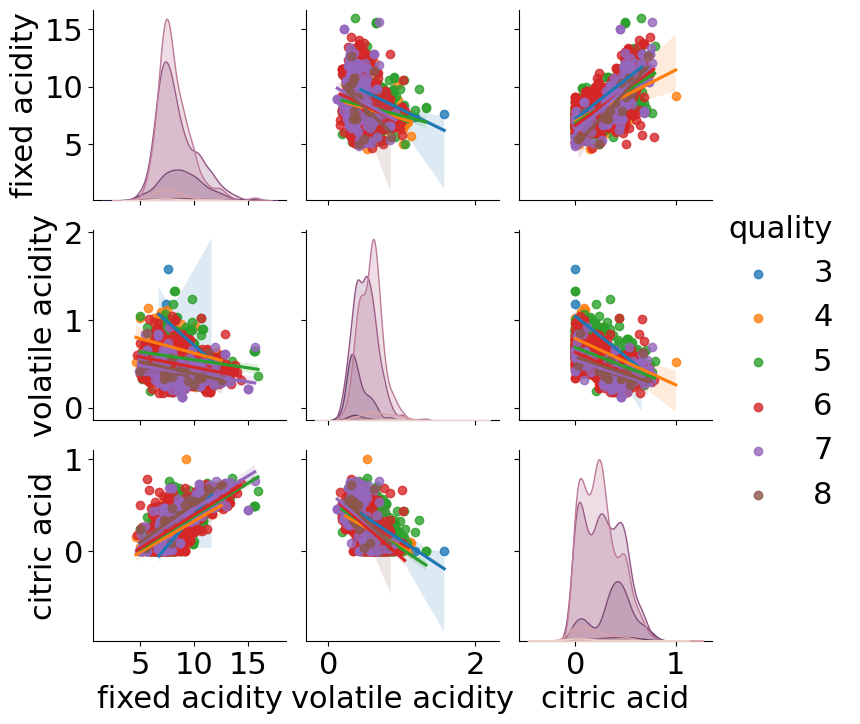

In [138]:
# pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

/var/folders/yh/kw1cv88n6md03rt17nczlk240000gn/T/ipykernel_19309/1316749677.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


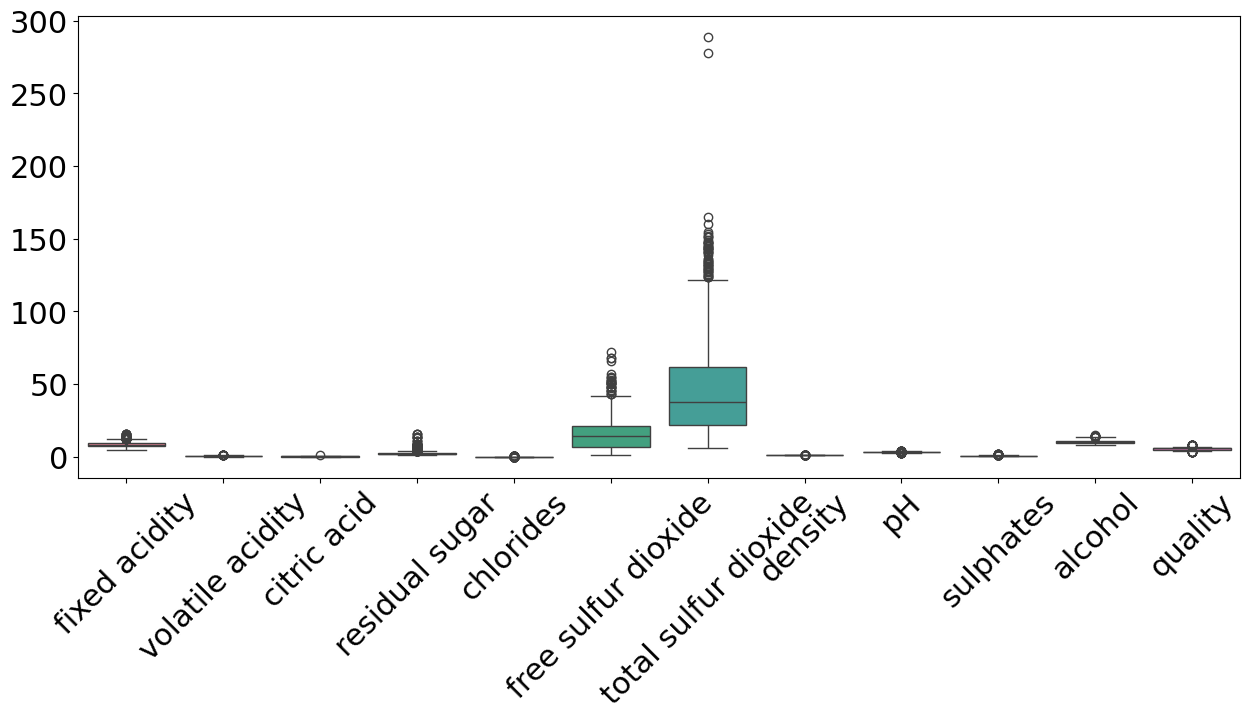

In [139]:
# plot some data
fig,ax = plt.subplots(1,figsize=(15,6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


# remove rows with outliers
# data = data[data['total sulfur dioxide']<200]

In [140]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [141]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
    mean = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data[col] = (data[col] - mean) / stdev

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


/var/folders/yh/kw1cv88n6md03rt17nczlk240000gn/T/ipykernel_19309/1316749677.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


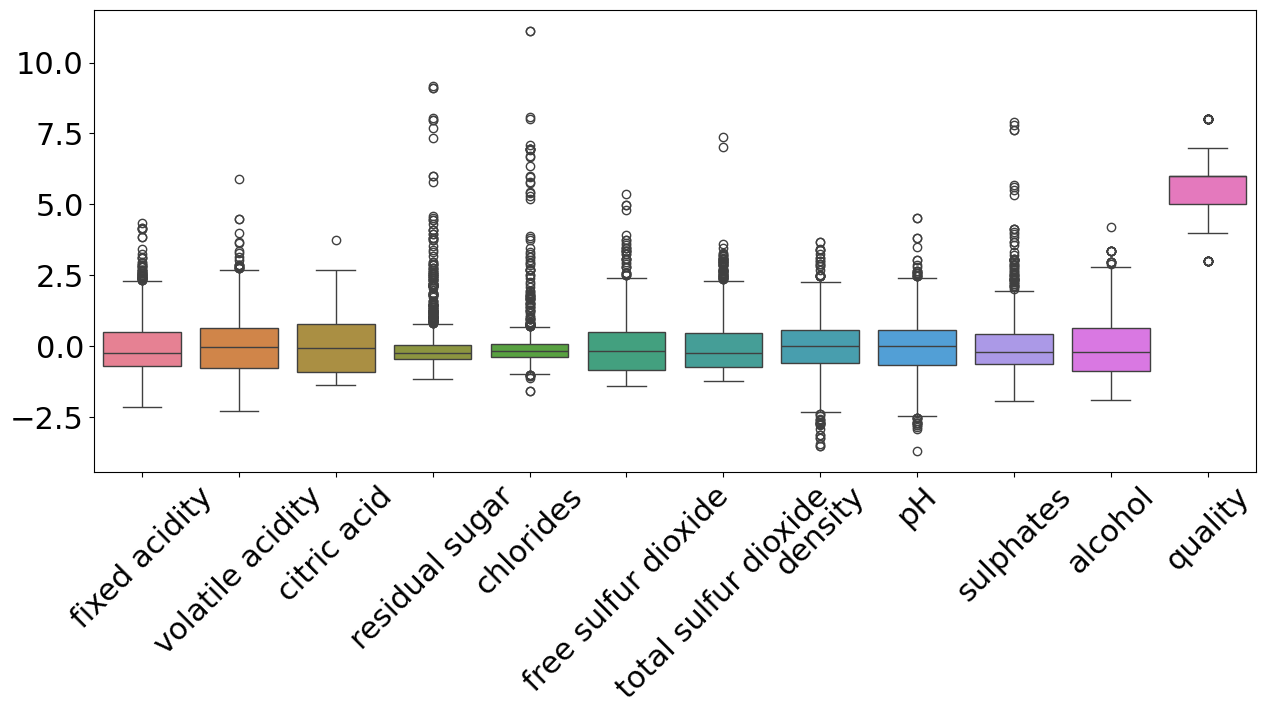

In [142]:
# plot some data
fig,ax = plt.subplots(1,figsize=(15,6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


# remove rows with outliers
# data = data[data['total sulfur dioxide']<200]

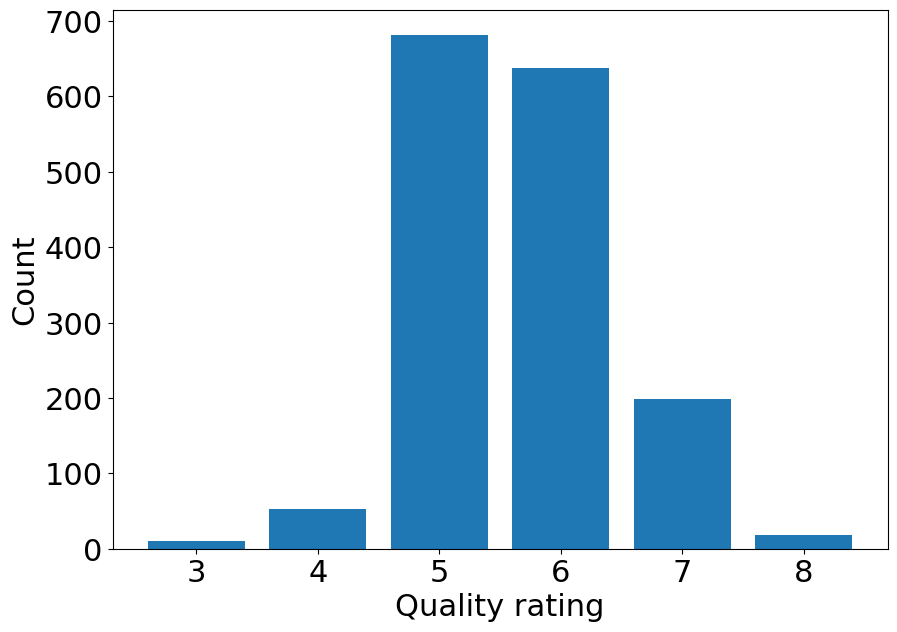

/var/folders/yh/kw1cv88n6md03rt17nczlk240000gn/T/ipykernel_19309/501044087.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['boolQuality'][data['quality']>5] = 1
/var/folders/yh/kw1cv88n6md03rt17nczlk240000gn/T/ipykernel_19309/50104

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [143]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

In [144]:
import torch

dataT = torch.tensor(data[cols2zscore].values).float()
y = torch.tensor(data['boolQuality'].values).float()

print(dataT.shape)
print(y.shape)

# turn it into tensor required by torch
y = y[:, None]
print(y.shape)

torch.Size([1599, 11])
torch.Size([1599])
torch.Size([1599, 1])


In [145]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

train_X, test_X, train_y, test_y = train_test_split(dataT, y, test_size=.1)


train_data = TensorDataset(train_X, train_y)
test_data  = TensorDataset(test_X, test_y)

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [146]:
# check sizes of data batches
for X, y in train_loader:
  print(X.shape, y.shape)

# go back and set drop_last=True in training DataLoader

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


## 2. Train

In [225]:
class Model(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        
        self.layers = torch.nn.ModuleDict({
            "input": torch.nn.Linear(input_size, 32),
            "hidden_1": torch.nn.Linear(32, 64),
            "output": torch.nn.Linear(64, 1) 
        })
        self.dropout = torch.nn.Dropout(p=0.2)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, X):
        for name, layer in self.layers.items():
            X = layer(X)
            if name != "output":
                X = torch.relu(X)
                X = self.dropout(X)  
        X = self.sigmoid(X)
        return X


In [226]:
model = Model(input_size=11)

In [232]:
import torch.optim as optim

criterion = torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

EPOCHS = 5000

for epoch in range(EPOCHS):
    model.train()
    loss = 0.0
    correct = 0
    total = 0

    for data, label in train_loader:
        optimizer.zero_grad()
        output = model(data)

        _loss = criterion(output, label)
        _loss.backward()
        optimizer.step()

        loss += _loss.item()

        # === accuracy 计算 ===
        preds = (output >= 0.5).float()
        correct += (preds == label).sum().item()
        total += label.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss/len(train_loader):.4f}, Accuracy: {acc:.4f}")


Epoch 1/5000, Loss: 0.2329, Accuracy: 0.9077
Epoch 2/5000, Loss: 0.2623, Accuracy: 0.9105
Epoch 3/5000, Loss: 0.2220, Accuracy: 0.9098
Epoch 4/5000, Loss: 0.2250, Accuracy: 0.9148
Epoch 5/5000, Loss: 0.2332, Accuracy: 0.9062
Epoch 6/5000, Loss: 0.2419, Accuracy: 0.9034
Epoch 7/5000, Loss: 0.2266, Accuracy: 0.8970
Epoch 8/5000, Loss: 0.2449, Accuracy: 0.9062
Epoch 9/5000, Loss: 0.2514, Accuracy: 0.9055
Epoch 10/5000, Loss: 0.2345, Accuracy: 0.8999
Epoch 11/5000, Loss: 0.2414, Accuracy: 0.9013
Epoch 12/5000, Loss: 0.2326, Accuracy: 0.9027
Epoch 13/5000, Loss: 0.2218, Accuracy: 0.9148
Epoch 14/5000, Loss: 0.2347, Accuracy: 0.9077
Epoch 15/5000, Loss: 0.2210, Accuracy: 0.9055
Epoch 16/5000, Loss: 0.2188, Accuracy: 0.9070
Epoch 17/5000, Loss: 0.2118, Accuracy: 0.9183
Epoch 18/5000, Loss: 0.2332, Accuracy: 0.9070
Epoch 19/5000, Loss: 0.2286, Accuracy: 0.9084
Epoch 20/5000, Loss: 0.2295, Accuracy: 0.9141
Epoch 21/5000, Loss: 0.2265, Accuracy: 0.9020
Epoch 22/5000, Loss: 0.2382, Accuracy: 0.90

### eval

In [233]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    with torch.no_grad():
        for data, label in test_loader:
            output = model(data)
            preds = (output >= 0.5).float()  
            correct += (preds == label).sum().item()
            total += label.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7688
